## Observations and Insights

1. 
2. 
3. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single dataset
mouse_results = pd.merge(mouse_metadata,study_results, on="Mouse ID",how= "outer")

# Display the data table for preview
mouse_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
print(mouse_results["Mouse ID"].count())
print(mouse_results["Mouse ID"].nunique())

1893
249


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice_time = mouse_results.duplicated(subset=["Mouse ID","Timepoint"],keep="first")

#Adding a column for Duplicate Mouse Results True of False
mouse_results["Duplicate Mouse Results"] = duplicate_mice_time

# Optional: Get all the data for the duplicate mouse ID. 
duplicate_results = mouse_results.loc[mouse_results["Duplicate Mouse Results"] == True, :]

#DataFrame of the Duplicated mouse
bad_mouse = mouse_results.loc[mouse_results["Mouse ID"] == 'g989']

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_results = mouse_results.drop(mouse_results.index[mouse_results['Mouse ID'] == 'g989'])
del clean_mouse_results["Duplicate Mouse Results"]
clean_mouse_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
print(clean_mouse_results["Mouse ID"].count())
print(clean_mouse_results["Mouse ID"].nunique())

1880
248


## Summary Statistics

In [36]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_group = clean_mouse_results.groupby(['Drug Regimen'])

In [37]:
# Mean of Tumor Volume
avg_tumor_reg = regimen_group["Tumor Volume (mm3)"].mean()

In [38]:
# Median of Tumor Volume
med_tumor_reg = regimen_group["Tumor Volume (mm3)"].median()

In [39]:
# Variance of Tumor Volume
var_tumor_reg = regimen_group["Tumor Volume (mm3)"].var()

In [40]:
# Standard Deviation of Tumor Volume
stdev_tumor_reg = regimen_group["Tumor Volume (mm3)"].std()

In [41]:
# SEM of Tumor Volume
sem_tumor_reg = regimen_group["Tumor Volume (mm3)"].sem()
# sem_tumor_reg = sem_tumor_reg[]

In [42]:
# Assemble the resulting series into a single summary dataframe.
regimen_statistics = pd.DataFrame({"Tumor Volume Mean" : avg_tumor_reg,
                                   "Tumor Volume Median" : med_tumor_reg,
                                   "Tumor Volume Variance" : var_tumor_reg,
                                   "Tumor Volume St. Deviation" : stdev_tumor_reg,
                                   "Tumor Volume SEM" : sem_tumor_reg})
regimen_statistics

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume St. Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [48]:
regimens = clean_mouse_results['Drug Regimen'].unique()
regimens

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [52]:
total_volume = regimen_group['Drug Regimen'].count()
total_volume

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

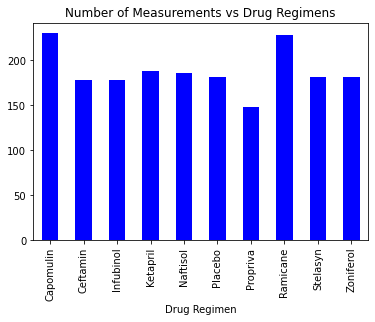

In [129]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_drug_pan = total_volume.plot(x = regimens,y = total_volume, 
                                 kind="bar", color='blue',
                                 title = "Number of Measurements vs Drug Regimens",
                               figsize = ())



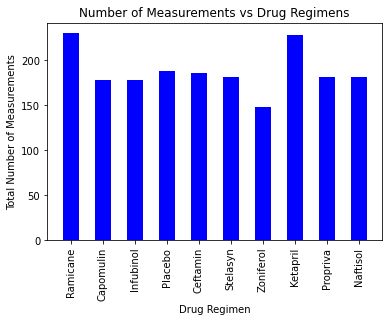

In [133]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

bar_drug_py = plt.bar(regimens, total_volume, color ="blue", 
                       width = .5)

plt.title("Number of Measurements vs Drug Regimens")
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.show()

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
